In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random

In [2]:
df=pd.read_csv('kmeans.csv',delimiter='\t')[['Distance_Feature','Speeding_Feature']]
data=np.array(df)

In [3]:
df.head()


Distance_Feature  Speeding_Feature
0             71.24              28.0
1             52.53              25.0
2             64.54              27.0
3             55.69              22.0
4             54.58              25.0

In [4]:
print(data)

[[ 71.24  28.  ]
 [ 52.53  25.  ]
 [ 64.54  27.  ]
 ...
 [170.91  12.  ]
 [176.14   5.  ]
 [168.03   9.  ]]


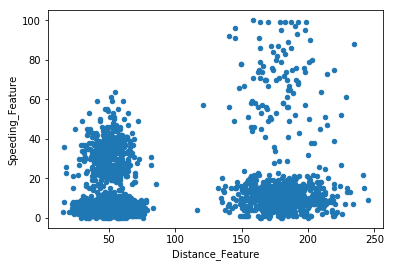

In [5]:
df.plot(x='Distance_Feature',y='Speeding_Feature',kind='scatter')

In [6]:
#initializing number of clusters
k=4

In [7]:
#centroids= np.random.rand(k,2)
centroids=np.array(df.sample(n=k))
new_centroids=centroids[:,np.newaxis,:]
distance=np.sqrt(np.sum(np.square(data-new_centroids),axis=2))
centroids

array([[195.7 ,  12.  ],
       [ 47.42,  35.  ],
       [ 48.84,   7.  ],
       [ 46.12,  33.  ]])

In [8]:
distance

array([[125.48422849, 143.75899589, 132.01494461, ...,  24.79      ,
         20.77483093,  27.83215586],
       [ 24.82725116,  11.22996438,  18.89694155, ..., 125.61361431,
        132.1697333 , 123.38059856],
       [ 30.70439708,  18.37433264,  25.42616762, ..., 122.17235735,
        127.31570995, 119.20677875],
       [ 25.61277806,  10.2512487 ,  19.37256823, ..., 126.54463284,
        133.00075338, 124.24994205]])

In [9]:
distance.shape

(4, 4000)

In [10]:
index=np.argmin(distance,axis=0)
index

array([1, 3, 1, ..., 0, 0, 0], dtype=int64)

In [11]:
for i in range(100):
    distance=np.sqrt(np.sum(np.square(data-new_centroids),axis=2))
    index=np.argmin(distance,axis=0)
#c1,c1,c3,c4 are the clusters
    c1=[]
    c2=[]
    c3=[]
    c4=[]
    
#assigning different data set to the particular cluster
    for i in range(len(index)):
        if index[i]==0:
            c1.append(data[i])
        if index[i]==1:
            c2.append(data[i])
        if index[i]==2:
            c3.append(data[i])
        if index[i]==3:
            c4.append(data[i])
            
#updating centroid       
    centroids[0] = np.mean(c1,axis=0)
    centroids[1] = np.mean(c2,axis=0)
    centroids[2] = np.mean(c3,axis=0)
    centroids[3] = np.mean(c4,axis=0)


In [12]:
# no of data point in each cluster
len(c1),len(c2),len(c3),len(c4)

(799, 224, 2763, 214)

In [13]:
centroids

array([[180.09085106,  18.24155194],
       [ 57.48580357,  35.61607143],
       [ 50.03931958,   5.17119073],
       [ 42.7011215 ,  28.23831776]])

In [14]:
centroids.shape

(4, 2)

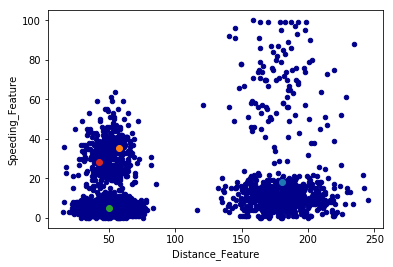

In [15]:
#Plotting of clusters
df.plot(x='Distance_Feature',y='Speeding_Feature',kind='scatter',color='DarkBlue')
for i in range(len(centroids)):
    plt.scatter(centroids[i][0],centroids[i][1])
    